**Importações primárias**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.graph_objs as go
from shapely.geometry import Point
from plotly.offline import plot, iplot

**Leitura do .csv, utilizando o 'scrubbed' ao invés do 'complete' como teste**

In [27]:
dataFrame = pd.read_csv('/content/scrubbed.csv', delimiter=',', skiprows=0, low_memory=False)

In [28]:
dataFrame.dropna(subset = ['country'], inplace=True)
dataFrame.dropna(subset = ['state'], inplace=True)
dataFrame

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


**Lidando com datetime para que possamos utilizar 'data' para as análises**

In [29]:
dataFrame["datetime"] = dataFrame["datetime"].apply(lambda x: x.replace("24:00", "00:00"))
dataFrame['datetime'] = pd.to_datetime(dataFrame['datetime'])

**Separando 'ano' do datetime, para que seja considerado uma coluna separada e transformando 'duração' em numérico**

In [7]:
dataFrame['duration (seconds)'] = pd.to_numeric(dataFrame['duration (seconds)'],errors='coerce')
dataFrame['year']=dataFrame['datetime'].dt.year

**Realizando as análises por 'País'**

In [8]:
numavisw = pd.DataFrame(dataFrame.groupby('country')['country'].count())
numavisw['Código'] = numavisw['country']
x = pd.Series(numavisw.index).apply(lambda x: x.upper())
numavisw.index = np.arange(0, numavisw.shape[0])
numavisw['País'] = x
numavisw.drop('country', axis=1, inplace=True)
numavisw

,Código,País
0,10,AU
1,2985,CA
2,12,GB
3,65114,US


In [9]:
data=dict(type='choropleth',
          colorscale='Tealgrn',
          z=numavisw['Código'],
          locations = ['Australia','Canada','Great Britain','USA'],
          locationmode = 'country names',
          text=numavisw['País'],
          marker=dict(line=dict(color='rgb(0,0,0)',width=1)),
          colorbar={'title': 'Número de avistamentos de OVNIs'})

In [10]:
layout=dict(title='Avistamentos de OVNIs ao redor do mundo',
            geo=dict(scope='world',
                     showlakes= True,
                     lakecolor='rgb(85,173,240)')
            )

In [23]:
choromap=go.Figure(data=[data],layout=layout)

**Número de avistamentos no mundo, onde o maior número de registros é nos Estados Unidos, com uma quantidade de 65.114 mil avistamentos.**

In [22]:
choromap.show()

**Construção e classificação de análise das figuras vistas, ou seja, os registros de maiores semelhanças entre os registros de avistamentos**

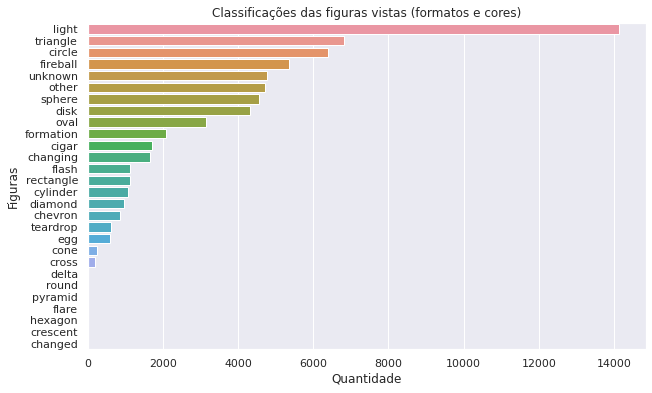

In [13]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
ax = sns.countplot(y='shape', data=dataFrame, \
                   order = dataFrame['shape'].value_counts().index).\
set_title('Classificações das figuras vistas (formatos e cores)')

plt.xlabel('Quantidade')
plt.ylabel('Figuras')
plt.show()

**Realizando as análises novamente, porém agora por 'Estado'**

In [14]:
numavis = pd.DataFrame(dataFrame.groupby('state')['state'].count())
numavis['Código'] = numavis['state']
x = pd.Series(numavis.index).apply(lambda x: x.upper())
numavis.index = np.arange(0, numavis.shape[0])
numavis['Estado'] = x
numavis.drop('state', axis=1, inplace=True)
numavis

,Código,Estado
0,288,AB
1,319,AK
2,643,AL
3,588,AR
4,2414,AZ
...,...,...
62,1232,WI
63,449,WV
64,175,WY
65,2,YK


In [15]:
data=dict(type='choropleth',
          colorscale='Tealgrn',
          z=numavis['Código'],
          locations=numavis['Estado'],
          locationmode= 'USA-states',
          text=numavis['Estado'],
          marker=dict(line=dict(color='rgb(255,255,255)',width=1)),
          colorbar={'title': 'Número de avistamentos de OVNIs'})

In [16]:
layout=dict(title='Avistamentos de OVNIs ao redor dos Estados Unidos',
            geo=dict(scope='usa',
                     showlakes= True,
                     lakecolor='rgb(85,173,240)')
            )

In [21]:
choromap=go.Figure(data=[data],layout=layout)

**Número de avistamentos nos EUA, onde o maior registro é dado na Califórnia com 8.912 avistamentos.**

In [20]:
choromap.show()

**Classificação de análise de quantidade de avistamentos por estados. Basicamente outra maneira de visualizarmos a análise acima, porém agora com todos os estados citados em um ranking.**

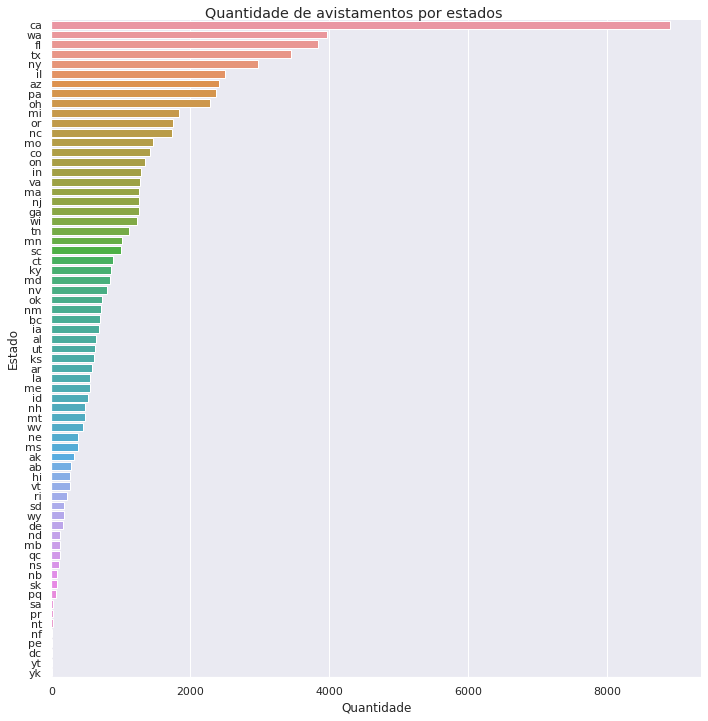

In [19]:
ax = sns.catplot(y='state',
            data=dataFrame,
            kind='count',
            height=10,
            order = dataFrame['state'].value_counts().index)

ax.fig.suptitle('Quantidade de avistamentos por estados', x=0.5, y=1)

plt.ylabel('Estado')
plt.xlabel('Quantidade')
plt.show()